In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

data = pd.read_csv('stprdata.csv')

data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['previous_stroke'] = data['previous_stroke'].map({'No': 0, 'Yes': 1})
data['previous_spinal_injuries'] = data['previous_spinal_injuries'].map({'No': 1, 'Yes': 0})

X = data[['gender', 'age', 'previous_stroke', 'previous_spinal_injuries', 'muscle_strength', 'hypertension', 'sugar','body_mass_index']]
y1 = data['target_stroke']
y2 = data['target_paralysis']

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y1_train, y2_train)

y_pred1 = rf_model.predict(X_test)
y_pred2 = rf_model.predict(X_test)

accuracy1 = accuracy_score(y1_test, y_pred1)
accuracy2 = accuracy_score(y2_test, y_pred2)

print("Accuracy for target stroke:", accuracy1*100)
print("Accuracy for target paralysis:", accuracy2*100)


Accuracy for target stroke: 97.05882352941177
Accuracy for target paralysis: 88.23529411764706


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pickle

new_data = pd.read_csv('test_data.csv')

new_data['gender'] = new_data['gender'].map({'Male': 0, 'Female': 1})
new_data['previous_stroke'] = new_data['previous_stroke'].map({'No': 0, 'Yes': 1})
new_data['previous_spinal_injuries'] = new_data['previous_spinal_injuries'].map({'No': 1, 'Yes': 0})

new_data_test = new_data[['gender', 'age', 'previous_stroke', 'previous_spinal_injuries', 'muscle_strength', 'hypertension', 'sugar', 'body_mass_index']]

y_pred_stroke = rf_model.predict_proba(new_data_test)[:, 0]
y_pred_paralysis = rf_model.predict_proba(new_data_test)[:, 1]

for i in range(len(new_data_test)):
  if y_pred_stroke[i] <= 0.6:
    y_pred_stroke[i] = 1
  else:
    y_pred_stroke[i] = 0
  if y_pred_paralysis[i] >=0.49:
    y_pred_paralysis[i] = 1
  else:
    y_pred_paralysis[i] = 0
stroke_accuracy = accuracy_score(new_data['target_stroke'], y_pred_stroke)

paralysis_accuracy = accuracy_score(new_data['target_paralysis'], y_pred_paralysis)

print("Accuracy for stroke:", stroke_accuracy)
print("Accuracy for paralysis:", paralysis_accuracy)


Accuracy for stroke: 0.8
Accuracy for paralysis: 0.8


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


# Load the new data
new_data = pd.DataFrame({
    "gender": ["Male"],
    "age": [30],
    "previous_stroke":["No"],
    "previous_spinal_injuries":["Yes"],
    "muscle_strength":[6],
    "hypertension":[1],
    "sugar":[8.8],
    "body_mass_index":[23.9]

})
# Preprocess the new data
new_data['gender'] = new_data['gender'].map({'Male': 0, 'Female': 1})
new_data['previous_stroke'] = new_data['previous_stroke'].map({'No': 0, 'Yes': 1})
new_data['previous_spinal_injuries'] = new_data['previous_spinal_injuries'].map({'No': 1, 'Yes': 0})

new_data_test = new_data[['gender', 'age', 'previous_stroke', 'previous_spinal_injuries', 'muscle_strength', 'hypertension', 'sugar','body_mass_index']]

y_pred_stroke = rf_model.predict_proba(new_data_test)[:,0]
y_pred_paralysis = rf_model.predict_proba(new_data_test)[:,1]

if y_pred_stroke<0.5:
  print("High risk of Stroke")
else:
  print("Low risk of Stroke")
if y_pred_paralysis>=0.5:
  print("High risk of Paralysis")
else:
  print("Low risk of Paralysis")



Low risk of Stroke
Low risk of Paralysis


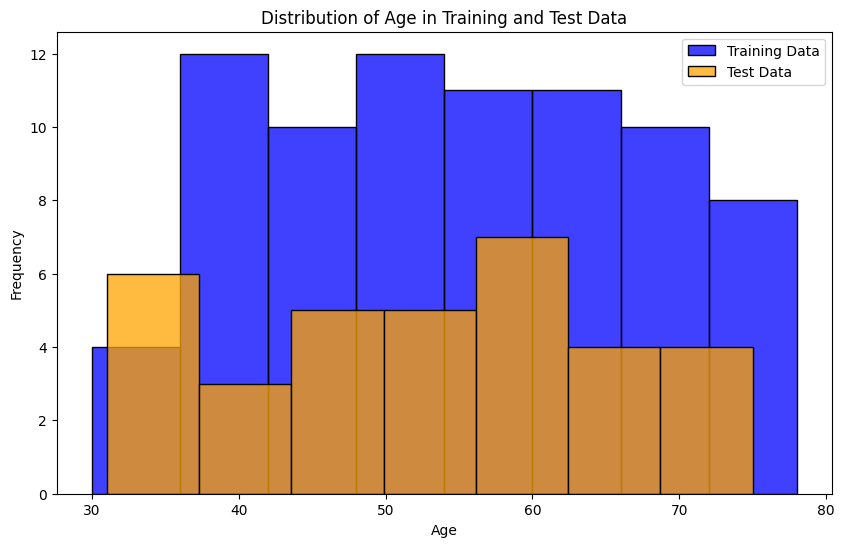

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('stprdata.csv')

# Preprocess the data (convert categorical variables to numerical)
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['previous_stroke'] = data['previous_stroke'].map({'No': 0, 'Yes': 1})
data['previous_spinal_injuries'] = data['previous_spinal_injuries'].map({'No': 1, 'Yes': 0})


X = data[['gender', 'age', 'previous_stroke', 'previous_spinal_injuries', 'muscle_strength', 'hypertension', 'sugar', 'body_mass_index']]
y1 = data['target_stroke']
y2 = data['target_paralysis']


X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.3, random_state=42)


plt.figure(figsize=(10, 6))
sns.histplot(X_train['age'], color='blue', label='Training Data')
sns.histplot(X_test['age'], color='orange', label='Test Data')
plt.title('Distribution of Age in Training and Test Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


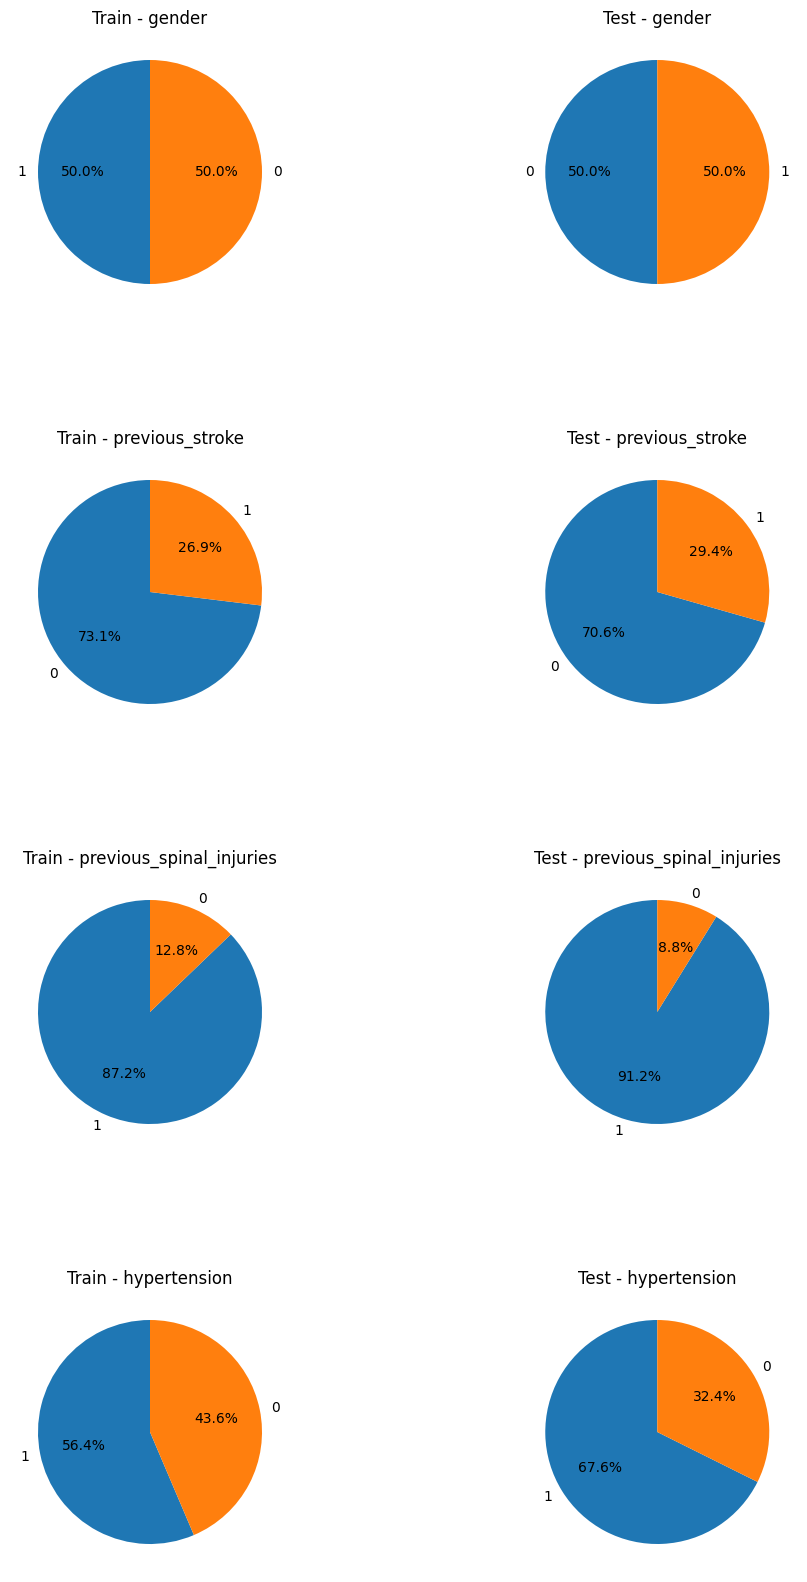

In [9]:
import matplotlib.pyplot as plt


categorical_columns = ['gender', 'previous_stroke', 'previous_spinal_injuries', 'hypertension']


fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=2, figsize=(12, 20))
plt.subplots_adjust(hspace=0.5)


for i, col in enumerate(categorical_columns):
    train_counts = X_train[col].value_counts()
    test_counts = X_test[col].value_counts()

    # Pie chart for training data
    axes[i, 0].pie(train_counts, labels=train_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i, 0].set_title(f'Train - {col}')

    # Pie chart for testing data
    axes[i, 1].pie(test_counts, labels=test_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Test - {col}')

plt.show()



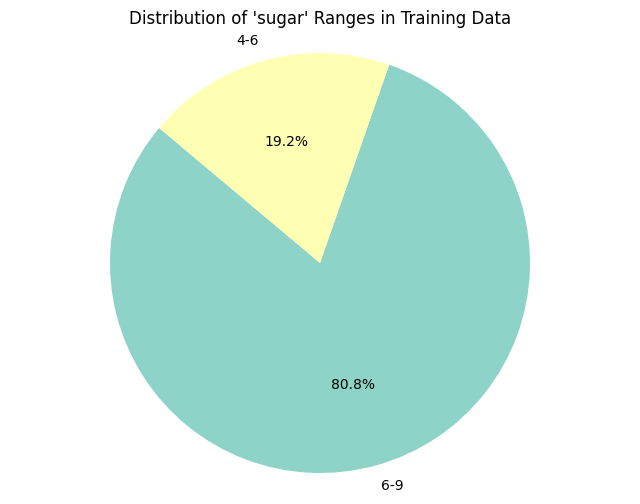

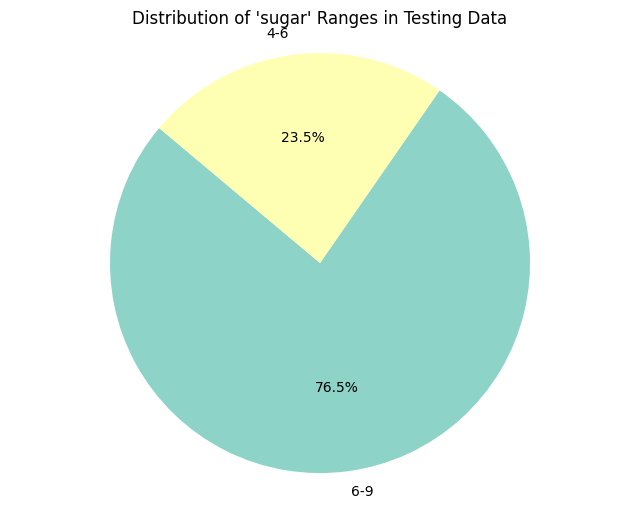

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


ranges = [(4, 6), (6, 9)]
labels = ['4-6', '6-9']


def create_pie_chart(data_frame, title):
    data_frame['sugar_range'] = pd.cut(data_frame['sugar'], bins=[r[0] for r in ranges] + [ranges[-1][1]], labels=labels, right=False)
    range_counts = data_frame['sugar_range'].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Create pie chart for training data
create_pie_chart(X_train, "Distribution of 'sugar' Ranges in Training Data")

# Create pie chart for testing data
create_pie_chart(X_test, "Distribution of 'sugar' Ranges in Testing Data")


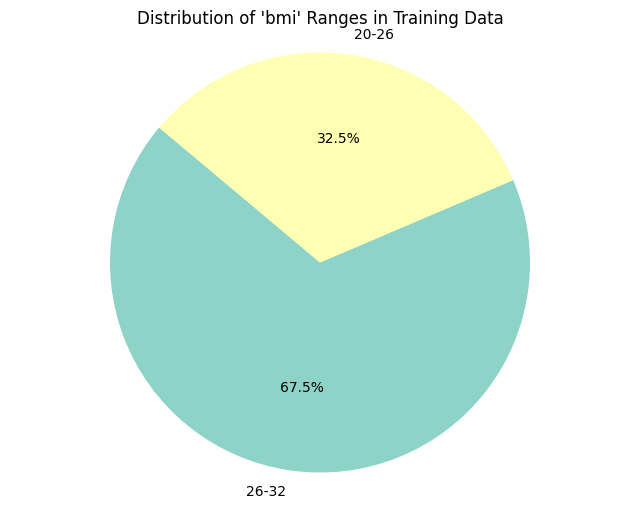

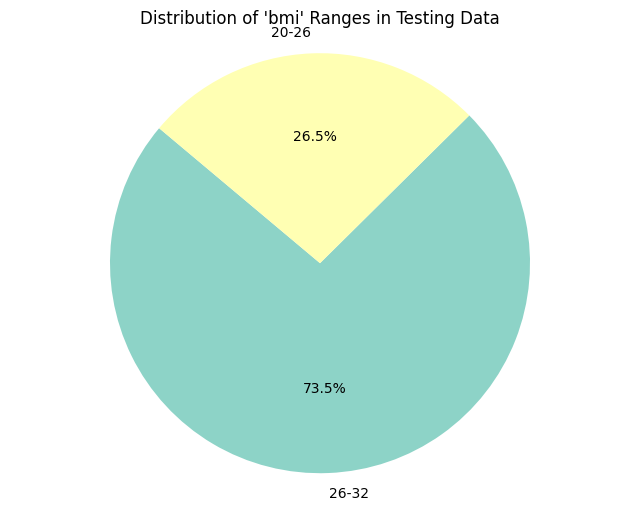

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


ranges = [(20, 26), (26, 32)]
labels = ['20-26', '26-32']

def create_pie_chart(data_frame, title):
    data_frame['bmi_range'] = pd.cut(data_frame['body_mass_index'], bins=[r[0] for r in ranges] + [ranges[-1][1]], labels=labels, right=False)
    range_counts = data_frame['bmi_range'].value_counts()

    plt.figure(figsize=(8, 6))
    plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Create pie chart for training data
create_pie_chart(X_train, "Distribution of 'bmi' Ranges in Training Data")

# Create pie chart for testing data
create_pie_chart(X_test, "Distribution of 'bmi' Ranges in Testing Data")


Confusion Matrix:
 [[23  1]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.91      1.00      0.95        10

    accuracy                           0.97        34
   macro avg       0.95      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



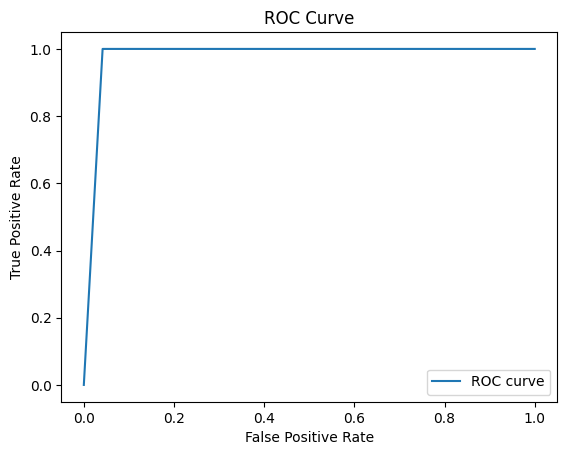

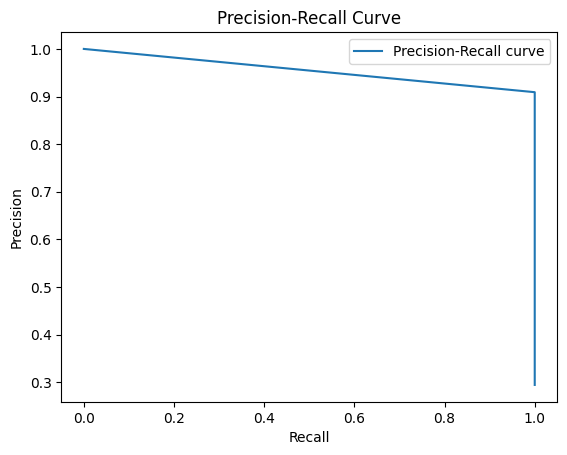

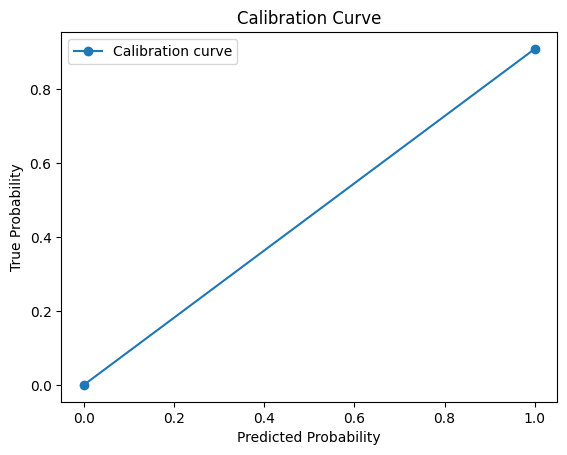

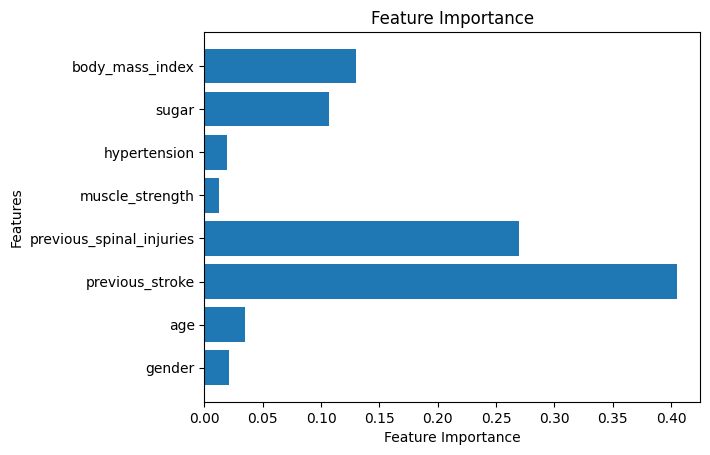

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y1_test, y_pred1)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y1_test, y_pred1)
print("Classification Report:\n", class_report)

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y1_test, y_pred1)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


precision, recall, thresholds_pr = precision_recall_curve(y1_test, y_pred1)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()


prob_true, prob_pred = calibration_curve(y1_test, y_pred1, n_bins=10)
plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()


feature_importance = rf_model.feature_importances_
plt.figure()
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()
